In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/train.csv
../input/test.csv
../input/googleplaystore.csv
../input/googleplaystore_user_reviews.csv
../input/data.csv


<h2>   
      <span>          
           Contents
    </span>
       
</h2>
<span>
    <ul>
        <li><a href='#intro'>1. Introduction</a></li>
        <ul>
            <li><a href='#background'>1.1 Background info</a></li>
            <li><a href='#data'>1.2 Dataset information</a></li>
        </ul>
        <li><a href='#libraries'>2. Python Libraries</a></li>
        <ul>
            <li><a href='#python'>2.1 Import Python Libraries</a></li>
         </ul>
        <li><a href='#understand'>3. Understanding the data</a></li>
        <ul>
            <li><a href='#import'>3.1 Importing the input csv</a></li>
            <li><a href='#inspect'>3.2 Overview the dataframes</a></li>
            <li><a href='#unwanted'>3.3 Delete Unwanted Columns</a></li>
        </ul>
              <li><a href='#eda'>4. EDA (Exploratory Data Anslysis)</a></li>
        <ul>
            <li><a href='#app_Rating'>4.1 App Rating</a></li>
            <li><a href='#rating_cate'>4.2 Rating Category</a></li>
            <li><a href='#type'>4.3 App Type</a></li>        
        </ul>
              <li><a href='#high'>5. High Rating Apps</a></li>
        <ul>
            <li><a href='#high_app'>5.1 App Category</a></li>
            <li><a href='#family'>5.2 FAMILY App</a></li>
            <li><a href='#install'>5.3 Installations Details</a></li>
            <li><a href='#top'>5.4 Top App</a></li>
            <li><a href='#free'>5.5 Free/Chargeable App</a></li>   
        </ul>
                <li><a href='#low'>6. Low Rating Apps</a></li>
        <ul>
            <li><a href='#low_app'>6.1 App Category</a></li>
             <li><a href='#tools'>6.2 TOOLS Category</a></li>
             <li><a href='#age'>6.3 Age restrictions </a></li>
        </ul>  
                <li><a href='#obser'>7. Observation</a></li>
                                


We will visualize the Play Store Analysis with the Plotly and SNS Modules to get some interactive data.

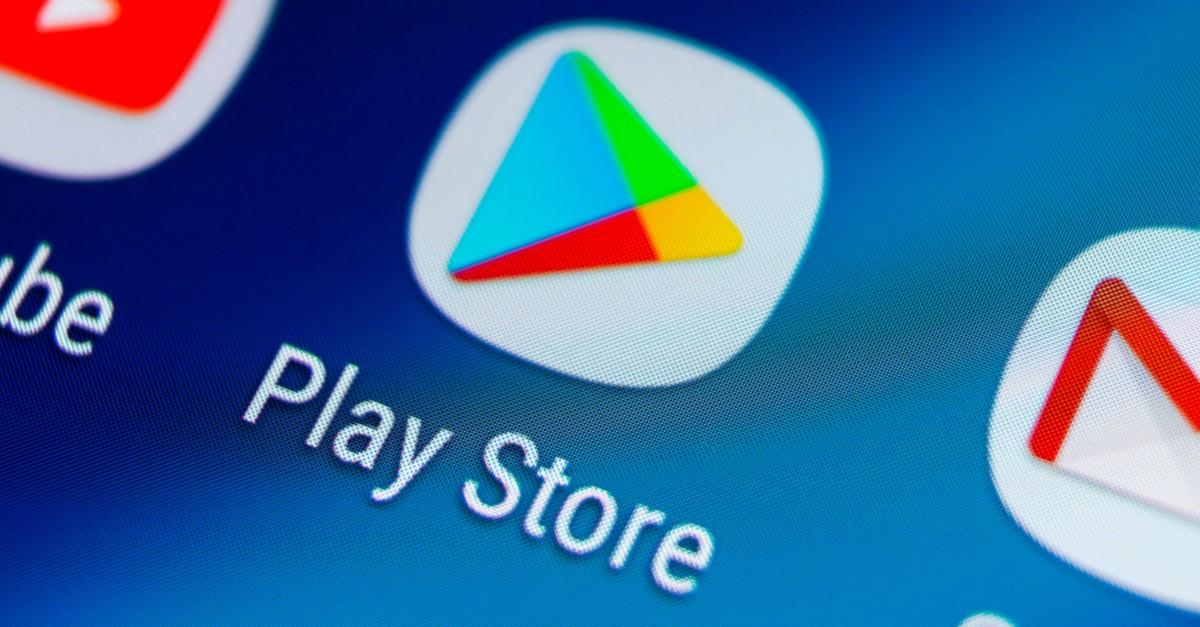

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. Introduction:
            </span>   
        </font>    
</h2>

<a id="intro"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
            1. Background info:
            </span>   
        </font>    
</h3>

<p>
    
 With the sheer number of available apps for your Android device, the choices can be overwhelming.
    
With this guide, we’ve distilled a mammoth assortment of apps down to 100 of the very best. We’ve sorted them into neat categories, from core apps to lesser known selections — we believe there is something for everyone
    
    
    
</p>    

<a id="data"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
            1.2 Dataset information:
            </span>   
        </font>    
</h3>

<span style='font-family:Georgia'>
    <table>
        <tr>
            <th>Feature</th>
            <th>Definition</th>
        </tr>
        <tr>
            <td>App</td>
            <td>Name of an application</td>
        </tr>
        <tr>
            <td>Category</td>
            <td>App Category</td>
        </tr>
        <tr>
            <td>Rating</td>
             <td>App Rating from the user</td>
        </tr>
        <tr>
            <td> Review</td>
            <td>App Review</td>
        </tr>
        <tr>
            <td>Size</td>
             <td>App Size</td>
        </tr>
        <tr>
            <td> Installs</td>
            <td>Installations Information</td>
        </tr>
        <tr>
            <td>Type</td>
            <td>App Type (Free /Chargeable)</td>
        </tr>
        <tr>
            <td>fare</td>
            <td>numeric values</td>
        </tr>
        <tr>
            <td> Price</td>
            <td> App Price</td>
        </tr>
        <tr>
            <td>Content</td>
            <td>Age Restriction</td>
        </tr>
       <tr>
            <td>Genres</td>
            <td>App Genres</td>
        </tr>
    </table>  
</span>

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. Python Libraries:
            </span>   
        </font>    
</h2>

<a id="libraries"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
           2.1 Import Python Libraries:
            </span>   
        </font>    
</h3>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# FOr plotly backend
pd.options.plotting.backend = "plotly"


<a id="understand"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
           3. Understanding the data:
            </span>   
        </font>    
</h2>

<a id="import"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
          3.1 Importing the input data:
            </span>   
        </font>    
</h3>

In [34]:
play_store = pd.read_csv("../input/googleplaystore.csv")
play_store.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  
2               Art & Design    August 1, 2018       1.2.4  4.0.3 and up

In [35]:
user_review = pd.read_csv('../input/googleplaystore_user_reviews.csv')
user_review.head(4)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000

The above data can be used for the sentiment analysis, so we will focus only on the google play review data to get the overview

<a id="inspect"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
          3.2 Overview the dataframes:
            </span>   
        </font>    
</h3>

In [36]:
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [37]:
play_store.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

<a id="unwanted"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
          3.3 Delete Unwanted Columns:
            </span>   
        </font>    
</h3>

In [38]:
## Delete unwanted columns


play_store.drop(['Android Ver', 'Current Ver', 'Last Updated'], axis=1, inplace=True)

<p>
    The above columns had missing  values:
    (1) Rating
    (2) Type
    (3) Content Rating
    (4) Current Ver
    (5) Android Ver
 </p>   

In [39]:
play_store['Rating'].isnull().sum(), play_store['Rating'].shape[0]

(1474, 10841)

In [40]:
play_store['Rating'].value_counts().sum()

9367

Out of 10841 ratings, 1474 are with null values and remaining 9367 ahave ratings

In [41]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

<a id="eda"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
          4. EDA (Exploratory Data Analysis):
            </span>   
        </font>    
</h2>

<a id="app_Rating"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
          4.1 App Rating:
            </span>   
        </font>    
</h3>

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Rating', ylabel='count'>

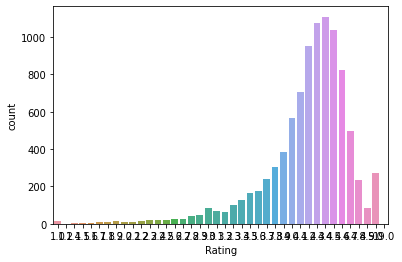

In [42]:

sns.countplot('Rating', data=play_store)

In [43]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# play_store['Rating'].iplot(kind='hist', xTitle='Rating', yTitle='App Available', title='Rating Overview')

It is better to group the Rating and neglect the floating points


for e.g:- 4.5 to 4-5 group

0-2 - low

3-4 - average

4-5 - high

In [44]:
 play_store['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

<a id="rating_cate"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         4.2 Rating Category:
            </span>   
        </font>    
</h3>

In [45]:
def rating_group(rating):

    try:
        rating = round(rating)
        if int(rating) in range(0,3):
            return 'low'
        elif int(rating) in range(3,5):
            return 'Average'
        elif int(rating) in range(4,6):
            return 'High'
    except ValueError as error:
        return 'none'

    
play_store['rating_group'] = play_store['Rating'].apply(rating_group)

In [46]:
 play_store['rating_group'].value_counts()

Average    7299
High       1917
none       1474
low         150
Name: rating_group, dtype: int64

In [47]:
# play_store['rating_group'].value_counts().iplot(kind='bar', title='Rating Category', xTitle='Rating', yTitle = 'number of app')

**Observations**:

Majority of the Apps have rating between 3 and 4.5. 

In [48]:
play_store[play_store['rating_group'] == 'none'].value_counts().sum()

0

In [49]:
play_store.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres rating_group  
0               Art & Design      Average  
1  Art & Design;Pretend Play      Average  
2               Art & Design         High

<a id="type"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         4.3 App Type:
            </span>   
        </font>    
</h3>

In [50]:
# check the Average Rating App Type
play_store['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

Most of the App are of Free Version. Let check user gives what type of rating to free app

In [51]:
# play_store[play_store.Type == 'Free']['rating_group'].value_counts().iplot(kind='bar')

As expected, User reviewed 6870 Apps with the Average rating between 3-5  and 1709 Apps with the High Rating close to 5/5.

In [52]:
play_store.head(3)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   

  Reviews  Size    Installs  Type Price Content Rating  \
0     159   19M     10,000+  Free     0       Everyone   
1     967   14M    500,000+  Free     0       Everyone   
2   87510  8.7M  5,000,000+  Free     0       Everyone   

                      Genres rating_group  
0               Art & Design      Average  
1  Art & Design;Pretend Play      Average  
2               Art & Design         High

<a id="rating_cate"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
         5. High Rating Apps:
            </span>   
        </font>    
</h2>

<a id="rating_cate"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         5.1 App Category:
            </span>   
        </font>    
</h3>

In [53]:
# let check the Highest rating app

# play_store[play_store['rating_group'] == 'High']['Category'].value_counts().iplot(kind='bar', title='App category', xTitle='App Type', yTitle='Number of High Reviews')

**Observations**:

App having Family and Game as category have the highest rating.

So, Android Developers having Game experience will experience high rating as compared to other category of Android app.

In [54]:
# Checkout the Family App Name to get the background information

high_rating_app = play_store[play_store['rating_group'] == 'High']
high_rating_app.head(4)

App        Category  Rating  \
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
9                       Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   
13                              Mandala Coloring Book  ART_AND_DESIGN     4.6   
16       Photo Designer - Write your name with shapes  ART_AND_DESIGN     4.7   

   Reviews  Size    Installs  Type Price Content Rating  \
2    87510  8.7M  5,000,000+  Free     0       Everyone   
9      121  3.1M     10,000+  Free     0       Everyone   
13    4326   21M    100,000+  Free     0       Everyone   
16    3632  5.5M    500,000+  Free     0       Everyone   

                     Genres rating_group  
2              Art & Design         High  
9   Art & Design;Creativity         High  
13             Art & Design         High  
16             Art & Design         High

<a id="family"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         5.2 FAMILY App:
            </span>   
        </font>    
</h3>

In [55]:
high_rating_app[high_rating_app.Category == 'FAMILY']['App'][:5]

2020    Super ABC! Learning games for kids! Preschool ...
2023                                      Candy Pop Story
2029                          Dog Run - Pet Dog Simulator
2032      Puzzle Kids - Animals Shapes and Jigsaw Puzzles
2040         No. Color - Color by Number, Number Coloring
Name: App, dtype: object

**Observations**:

We can see that the app which are main focus on the children got the high rating.
App like  Puzzles, Color Number, Learning Games for Kid and many more.


So,

Next time, developer should focus their app more on children specific, which will definetely give them high rating and max downloads

<a id="install"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         5.3 Installations Details:
            </span>   
        </font>    
</h3>

In [56]:
# check with the max installed app with the high rating
# high_rating_app['Installs'].value_counts().sort_index(ascending=False).iplot(kind='bar')


**Observations**:

WoooooooW.

TOtal 6 App got 500 millions downloads. THis is Crazy. Let find those 6 app names.

<a id="top"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         5.4 Top App:
            </span>   
        </font>    
</h3>

In [57]:
App_Name = high_rating_app[high_rating_app['Installs'] == "500,000,000+"]['App']
print("\n\nAPP with 500 Millions Downloads\n\n")
for app in App_Name:
    print("App:  {}".format(app))




APP with 500 Millions Downloads


App:  Google Duo - High Quality Video Calls
App:  SHAREit - Transfer & Share
App:  Clean Master- Space Cleaner & Antivirus
App:  Google Duo - High Quality Video Calls
App:  SHAREit - Transfer & Share
App:  Security Master - Antivirus, VPN, AppLock, Booster


Google Duo is among the APP which has 500 millions downloads.

<a id="free"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         5.5 Free/Chargeable App:
            </span>   
        </font>    
</h3>

In [58]:
high_rating_app['Price'].value_counts(sort=True)[:10]

0        1709
$2.99      36
$0.99      35
$1.99      23
$4.99      22
$3.99      19
$1.49      13
$2.49       9
$5.99       7
$6.99       5
Name: Price, dtype: int64

**Observations**:


Free App has 1709 user with the High Rating
Premium App with less then 5$ has more review as compared to App having more than 5$ as price.


If developer want to freemium their app, charge less than 5$.

<a id="low"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
         6. Low Rating Apps:
            </span>   
        </font>    
</h2>


<a id="rating_cate"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         6.1 App Category:
            </span>   
        </font>    
</h3>

In [59]:
low_rating_app = play_store[play_store['rating_group'] == 'low']
low_rating_app.head(4)

App Category  Rating Reviews  \
518                   Just She - Top Lesbian Dating   DATING     1.9     953   
520  EliteSingles – Dating for Single Professionals   DATING     2.5    5377   
527                          Sugar Daddy Dating App   DATING     2.5     277   
549  EliteSingles – Dating for Single Professionals   DATING     2.5    5377   

     Size  Installs  Type Price Content Rating  Genres rating_group  
518   19M  100,000+  Free     0     Mature 17+  Dating          low  
520   19M  500,000+  Free     0     Mature 17+  Dating          low  
527  5.7M  100,000+  Free     0     Mature 17+  Dating          low  
549   19M  500,000+  Free     0     Mature 17+  Dating          low

In [63]:
# low_rating_app['Category'].value_counts().iplot(kind='bar')

**Observations**:

App having Tools Category has the lowest rating among 10000+ Android App Data.

<a id="tools"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         6.2 TOOLS Category:
            </span>   
        </font>    
</h3>

In [61]:
low_rating_app[low_rating_app['Category'] == 'TOOLS']['App']

4010                          Bridge-C - Get More Storage
4161                                          G-Playlists
4669                 Remote For ATT U-verse TV - NOW FREE
4828                                        Moto Z Market
4910                              Carrier Air Conditioner
4935                                          Hi-Smart AC
5048                                  AppFinder by AppTap
5908                                    AZ REMOTE CONTROL
5941                                   Loreal - BA Makeup
6168                              BG Remover & Eraser Pro
6765                                          BT Notifier
7633                                           Co Checker
7677                                   Hercules CP Mobile
7758                               Webmail web mobile app
8131                                      CZ File Manager
8365                                        DG Smart life
8820                                       DS Creator 2.0
8857          

Above are the apps having very low rating.



Developers should first look at the category because Users are likely give very low rating to these kind of apps.

<a id="age"></a>
<h3>   
      <font color = red >
            <span style='font-family:Georgia'>
         6.3 Age restrictions:
            </span>   
        </font>    
</h3>

In [62]:
import plotly.graph_objs as go
cf.go_offline()
rating_name = low_rating_app['Content Rating'].value_counts().sort_index().index
rating_count = low_rating_app['Content Rating'].value_counts().sort_index().tolist()

fig = go.Figure(data=[go.Pie(labels=rating_name,
                            values=rating_count,
                            textinfo = 'label + percent')])
fig.show()

**Observations**:


89% content is for people of all ages.

Rest have certain AGE restrictions.

<a id="rating_cate"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
        7. Observation:
            </span>   
        </font>    
</h2>



Final Observations:



(1)  Majority of Android Apps have only rating between 3 and 5.

(2)  Out of 11000 App, 80% App are free and 20% are charegable.

(3)  Total 6 App with Highest Rating have 500 Millions Downloads which is Crazy enough.

(4)  Top App is "Google Duo: Video Creating App"

(5)  Category like 'FAMILY, GAMES' have maximum reviews from the users with rating above 3+.

(6)  People preferred chargeable apps which has less than 5$ in rate.

(7) Low Rating Overview:-

 -   Category Like 'TOOLS' have worst rating.
 
 -   11% App have Age restrictions above 10+ Age.
 


FINISH






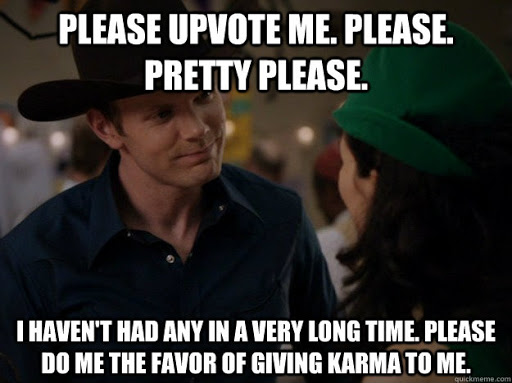

## FINISH.


###  UPVOTE THIS IF YOU LIKE DETAILS>